<IPython.core.display.Javascript object>


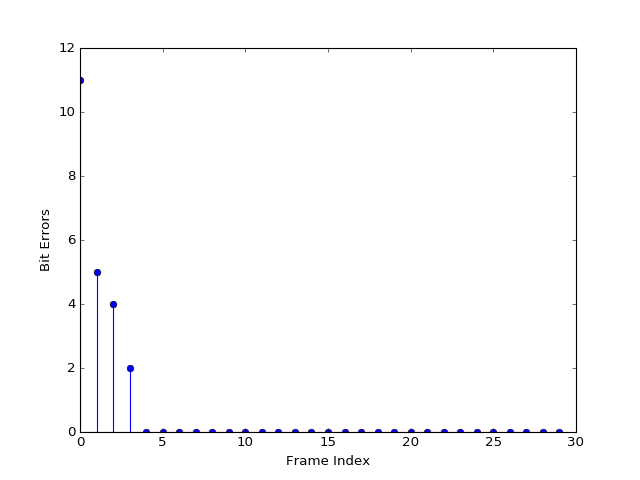

In [34]:
# %load questao2.py
import numpy as np
from matplotlib import pyplot as plt


def lms(w0, u, d, s):
    """
    Find the LMS filter coefficients.

    Parameters
    ----------
    w0 : np.ndarray
        Init weight vector with M taps. Dimension: (M,)
    u : np.ndarray
        Input data vector. Dimension: (N,)
    d : Desired Output data vector. Dimension: (N,)
    s : Step size.
    """
    N = u.size
    w = w0
    x = np.zeros_like(w0)
    for k in range(N):
        x = np.hstack([u[k], x[:-1]])
        ek = d[k] - w.conj() @ x
        dw = s * ek.conj() * x
        w = w + dw

    return w


pilots = np.array(
    [-1, -1, -1, +1, +1, -1, -1, -1, +1, +1, +1, +1, -1, +1, +1, -1, +1, -1])
LP = pilots.size
M = 6  # Number of filter coefficients
Lh = 2  # Channel memory
# LP = pilots.size  # Number of trainning symbols
LD = 150  # Number of data symbols
LG = 8  # Number of transmitted zeroes (guard interval)

# Canal
h = np.array([4, -5])  # A channel with 2 taps

# Initial filter
w = np.zeros(M)
d = pilots
step = 0.0015

# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
guard_interval = np.zeros(LG)

num_frames = 30
bit_errors = np.zeros(num_frames)

# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# xxxxxxxxxxxxxxx Frame 1 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
i = 0  # Frame index
while i < num_frames:
    data_points = 1-2*np.random.randint(0, 2, LD)

    # Frame to transmit
    frame_data = np.hstack([pilots, data_points, guard_interval])

    # Transmit the frame through the channel
    u = np.convolve(h, frame_data)

    # Desired data for the filter
    d = np.hstack([np.zeros(M-1), pilots[:LP-M+1]])

    # Find filter coefficients using LMS algorithm
    w = lms(w, u[:LP], d, step)

    # Filter the received data
    y = np.convolve(w.conj(), u)

    # Os dados filtrados de interesse incluem o primeiro elemento após a memória do
    # filtro encher até o final sem incluir os últimos (h.size-1) elementos
    # (memória do canal)
    tilde_data = np.sign(y[M-1:-h.size+1])

    # Calcula o número de bits errados
    bit_errors[i] = np.sum(tilde_data[LP:-LG] != frame_data[LP:-LG])
    # print(bit_errors[i] / LD)

    i = i + 1
    
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# xxxxxxxxxxxxxxx Plot the Bit Erros xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
plt.stem(bit_errors);
plt.xlabel("Frame Index")
plt.ylabel("Bit Errors")
plt.savefig("bit_errors.pdf")
